# Statistic analysis for house prices (python)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statistics

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

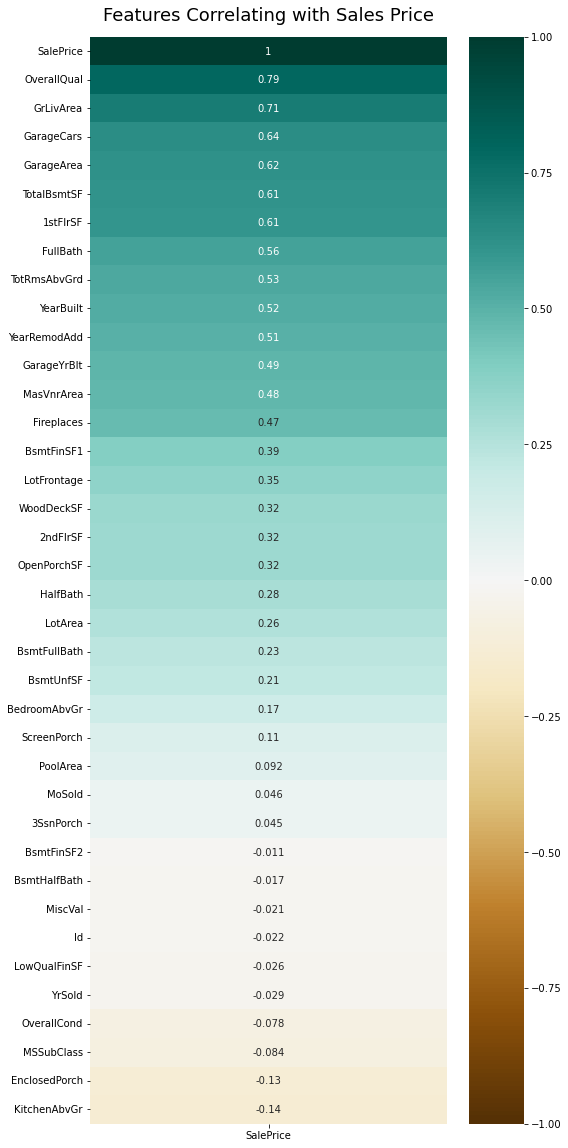

In [4]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## Statistika deskriptif untuk kolom `SalePrice`

Tunjukkan statistika deskriptif untuk variabel harga rumah (Column 
Name : `SalePrice`)!

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

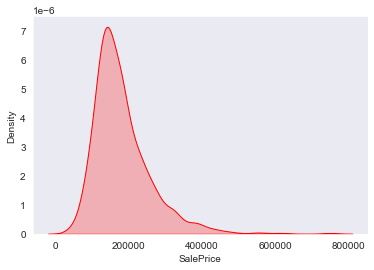

In [5]:
sns.set_style("dark")
sns.kdeplot(df['SalePrice'], shade=True, color="r")
# sns.kdeplot(df['OverallQual'], shade=True, color="b")

Grafik persebaran berbentuk <b> Positivly skewed</b> dengan outlier berada di sebelah kanan dari nilai <b> median </b>

### Measure of Central Tendency

In [6]:
saleprice = df['SalePrice']
saleprice.mean() # mencari nilai mean pada data

180921.19589041095

Mean adalah nilai rata-rata, pada kasus data `SalePrice` rumah di Ames, Iowa, Amerika Serikat memiliki rata-rata sebesar <b>180.921,19</b> Dollar AS. Nilai mean merupakan repesentasi harga jual rumah di Ames, Iowa, Amerika Serikat

In [7]:
saleprice.median() # mencari nilai median pada data

163000.0

In [8]:
saleprice.min() # nilai minimal dari kolom sale price

34900

In [9]:
saleprice.max() # nilai maksimal dari kolom sale price

755000

Median adalah nilai tengah, pada kasus data `SalePrice` nilai tengah dari harga rumah di Ames, Iowa, Amerika Serikat adalah <b>163.000</b> Dollar AS. Artinya nilai 50% dari data adalah nilai mininimal atau <b>39.900</b> sampai <b>163.000</b> dan 50% lain <b>163.000</b> sampai nilai maximum atau <b>755.000</b>

In [10]:
saleprice.mode() # mencari nilai mode atau nilai terbanyak pada data

0    140000
dtype: int64

Mode atau modus adalah nilai yang terbanyak, pada kasus data `SalePrice` harga rumah terbanyak di Ames, Lowa, Amerika Serikat adalah <b>140.000</b> Dollar AS. Artinya kebanyakan rumah di Ames, Iowa, Amerika Serikat dijual dengan harga <b>140.000</b> Dollar AS

### Measure of Spread

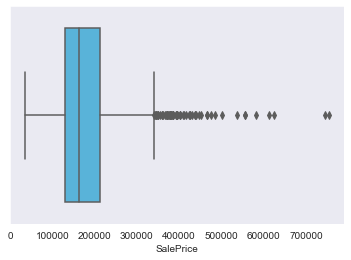

In [11]:
ax = sns.boxplot(x=df["SalePrice"], color='#44BBEE')

Dari box plot dapat dilihat banyaknya outliers yang berada pada sebelah kanan dari nilai median

In [12]:
print('Range:',df['SalePrice'].max()-df['SalePrice'].min()) # perhitungan range

Range: 720100


range data adalah rentang nilai minimum dan maksimum. <b>nilai range</b> yang sebesar <b>720.100</b> Dollar AS mewakili perbedaan besar data minimum dan maksimum `SalePrice`. Artinya rentang harga jual rumah di Ames, Iowa, Amerika Serikat adalah <b>720.100</b> Dollar AS

In [13]:
df['SalePrice'].var()

6311111264.297451

<b>nilai variance</b> yang sebesar <b>6311111264.29</b> digunakan untuk mengukur seberapa jauh penyebaran data dalam distribusi atau mengetahui tingkat keragamannya, dikarenakan nilai varian yang terbilang besar maka kita tarik kesimpulan data memiliki tingkat keragaman yang tinggi, atau dapat dikatakan harga jual rumah di Ames, Iowa, Amerika Serikat tidak dijual dengan harga yang sama.

In [14]:
print('Inter Quartile Range (IQR):',df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25))

Inter Quartile Range (IQR): 84025.0


In [15]:
df['SalePrice'].quantile(0.75)

214000.0

In [16]:
df['SalePrice'].quantile(0.25)

129975.0

<b>Inter Quartile Range</b> yang memiliki nilai <b>84025.0</b> digunakan untuk mengetahui persebaran data mulai dari 25% sampai 75%, Artinya dari nilai IQR dapat kita ketahui rentang 50% data harga rumah yang paling umum ditemukan, atau kasus `SalePrice` rumah di Ames, Iowa, Amerika Serikat, rentang harga dimulai dari <b>129.975</b> Dollar AS sampai <b>214.000</b>

### Kesimpulan

<b>nilai mean</b> atau rata-rata dari `SalePrice` adalah <b>180.921,19</b> Dollar AS, jika goalsnya adalah ingin memiliki harga yang lebih bersaing dari kebanyakan properti dengan asumsi fasilitas rumah dan tempat diabaikan, sebaiknya menggunakan harga jual dibawah <b>nilai median</b> yaitu sebesar <b>163.000,00</b> dollar AS. Hal ini dikarenakan grafik persebaran berbentuk <b> Positivly skewed</b> tidak disarankan menggunakan nilai mean karena data <b>not robust</b>.

<b>nilai modus</b> atau mode mewakili harga pasaran rumah yaitu sekitar <b>140.000</b> dollar AS dengan asumsi fasilitas dan tempat diabaikan.

## Statistika deskriptif pada kolom `saleprice` untuk setiap tahunnya

### Measure of Central Tendency

In [17]:
dfg_yrsold_median = df.groupby(df['YrSold'])['SalePrice'].median().reset_index()
dfg_yrsold_median

,YrSold,SalePrice
0,2006,163995.0
1,2007,167000.0
2,2008,164000.0
3,2009,162000.0
4,2010,155000.0


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

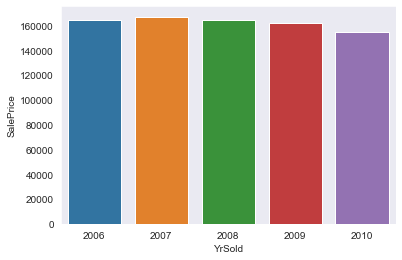

In [18]:
sns.barplot(x='YrSold', y='SalePrice', data=dfg_yrsold_median)

nilai median `SalePrice` dari tahun 2006 sampai 2010 menunjukan peningkatan harga rumah dari 2006 sebesar 163.995 menjadi 167000.0 pada tahun 2007. Penurunan data `SalePrice` terjadi pada tahun 2008 dan 2010 yang menunjukan tren penurunan `SalePrice`

In [19]:
dfg_yrsold_mean = df.groupby(df['YrSold'])['SalePrice'].mean().reset_index()
dfg_yrsold_mean

,YrSold,SalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

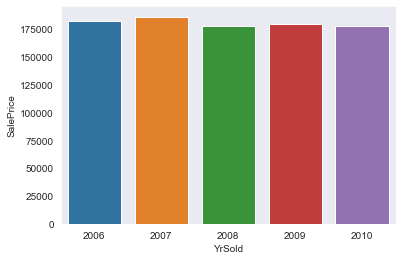

In [20]:
sns.barplot(x='YrSold', y='SalePrice', data=dfg_yrsold_mean)

nilai mean merupakan estimasi pemusatan data. `SalePrice` pada tahun 2006 - 2010 menunjukan kenaikan pada tahun 2007 namun memiliki tren melandai pada tahun 2008 - 2010.

In [21]:
dfg_yrsold_mode = df.groupby(df['YrSold'])['SalePrice'].apply(pd.Series.mode).reset_index()
dfg_yrsold_mode

,YrSold,level_1,SalePrice
0,2006,0,140000
1,2007,0,129000
2,2007,1,144000
3,2008,0,140000
4,2009,0,110000
5,2010,0,128000
6,2010,1,140000
7,2010,2,143000
8,2010,3,155000
9,2010,4,190000


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

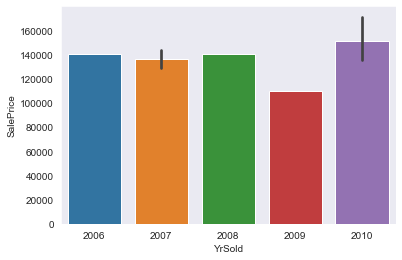

In [22]:
sns.barplot(x='YrSold', y='SalePrice', data=dfg_yrsold_mode)

nilai mode atau angka terbanyak akan menunjukan `SalePrice` yang paling banyak muncul pada harga rumah pada tahun 2006 - 2010. pada tahun 2009 mengalami penurunan harga jual rumah terbanyak dari tahun sebelumnya. pada tahun 2010 mengalami kenaikan yang signifikan.

### Measure of Spread

In [23]:
dfg_yrsold_range = df.groupby(df['YrSold'])['SalePrice'].max()-df.groupby(['YrSold'])['SalePrice'].min() # perhitungan range
dfg_yrsold_range

YrSold
2006    589689
2007    715700
2008    406261
2009    548033
2010    556657
Name: SalePrice, dtype: int64

nilai range adalah nilai tertinggi dikurangi nilai terendah. Dari nilai range tahun 2007 yaitu 715.700 dapat di tarik kesimpulan perbedaan harga rumah yang sangat mencolok dibandingkan tahun sebelum atau sesudahnya. nilai range terkecil terdapat pada tahun 2008 yang hanya 406.261 Dollar AS.

In [24]:
dfg_yrsold_var = df.groupby(df['YrSold'])['SalePrice'].var().reset_index()
dfg_yrsold_var

,YrSold,SalePrice
0,2006,6.308623e+09
1,2007,7.356179e+09
2,2008,4.863055e+09
3,2009,6.541451e+09
4,2010,6.472408e+09


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

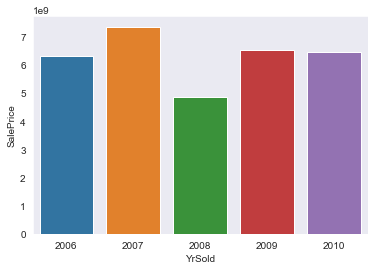

In [25]:
sns.barplot(x='YrSold', y='SalePrice', data= dfg_yrsold_var)

nilai varian adalah ukuran seberapa jauh sebuah kumpulan bilangan tersebar. pada data mengindikasikan nilai varian yang tinggi, artinya persebaran data condong menjauhi nilai rata-rata. hanya pada tahun 2008 harganya cenderung lebih tidak bervariasi dan mendekati nilai rata-ratanya.

In [26]:
df.groupby(['YrSold'])['SalePrice'].quantile(0.75) - df.groupby(['YrSold'])['SalePrice'].quantile(0.25)

YrSold
2006    87407.5
2007    89600.0
2008    75750.0
2009    87500.0
2010    85150.0
Name: SalePrice, dtype: float64

Nilai IQR merupakan rentang nilai 50% yang paling sering muncul dari data `SalePrice`. rentang persebaran dapat memberikan info bahwasannya rentang harga rumah yang paling sering terjual adalah 87407.5 pada tahun 2006, 89600.0 pada tahun 2007, 75750.0 pada tahun 2008, 87500.0 pada tahun 2009, 85150.0 pada tahun 2010

### Kesimpulan

Pada data dan sebelum melakukan pengujian hipotesis dapat kita ambil kesimpulan pergerakan harga rumah di Ames, Iowa, Amerika Serikat cenderung mengalami penurunan pada setiap tahunnya. Kenaikan harga rumah paling besar terjadi pada tahun 2007 selanjutnya terjadi penurunan pada setiap tahun berikutnya. 

## Mengetahui persebaran distribusi terhadap `saleprice`

Analisis persebaran distribusi pada saleprice digunakan untuk mengetahui persebaran harga rumah.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

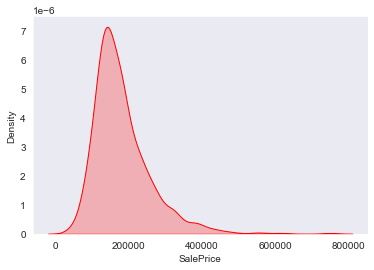

In [27]:
sns.set_style("dark")
sns.kdeplot(df['SalePrice'], shade=True, color="r")
# sns.kdeplot(df['OverallQual'], shade=True, color="b")

In [28]:
data_2006 = df[df['YrSold'] == 2006]
data_2007 = df[df['YrSold'] == 2007]
data_2008 = df[df['YrSold'] == 2008]
data_2009 = df[df['YrSold'] == 2009]
data_2010 = df[df['YrSold'] == 2010]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

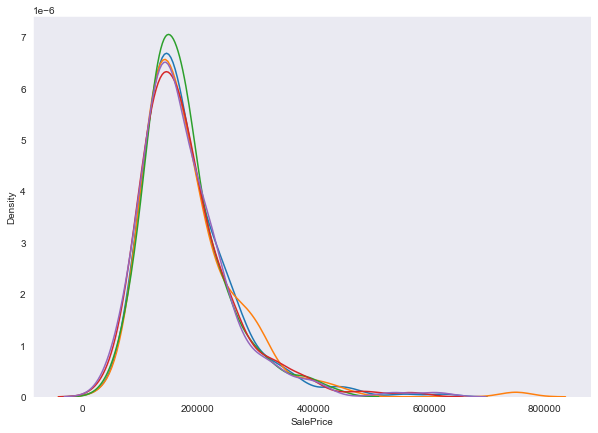

In [44]:
plt.figure(figsize = (10,7))
sns.kdeplot(data_2006['SalePrice'],label='2006')
sns.kdeplot(data_2007['SalePrice'],label='2007')
sns.kdeplot(data_2008['SalePrice'],label='2008')
sns.kdeplot(data_2009['SalePrice'],label='2009')
sns.kdeplot(data_2010['SalePrice'],label='2010')

### Kesimpulan

persebaran data berbentuk skew ke kanan, artinya banyak outliers yang lebih besar dari nilai median. Sebaiknya untuk pengukuran pemusatan menggunakan median karena data akan robust atau tidak terpengaruh nilai outliers. jika nilai outliers hilang maka data akan memiliki rata-rata yang sangat berbeda jauh dari sebelumnya. nilai rata-rata juga tidak mewakili keseluruhan data, pada kasus ini penggunaan nilai rata-rata akan mewakili data yang berada di kanan dari nilai median, sehingga pengambilan keputusan akan kurang tepat. alternatif lain mengetahui persebaran data yang umum dapat menggunakan nilai IQR sehingga pengambilan keputusan dapat setidaknya mewakili 50% dari data yang paling umum ditemukan yaitu dari 129.975 Dollar AS sampai 214.000 Dollar AS.

## Pengujian Statistika

Karena ada pernyataan bahwa setiap tahunnya harga rumah itu 
pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice) untuk itu pada kesempatan ini akan membuktikan apakah setiap tahun harga rumah mengalami kenaikan?

Penentuan Hipotesis

H0 = Harga rumah <b>tidak mengalami kenaikan</b> pada setiap tahunnya <br>
H1 = Harga rumah <b>mengalami kenaikan</b> pada setiap tahunnya <br>
Toleransi error = 5%

Asumsi data terdistribusi secara normal, solusinya jika data skew dapat menormalkan data terlebih dahulu dengan menggunakan logaritma dan menghapus outliers atau dapat juga mengubah analisis menjadi non parametrik. Analisis non parametrik tidak memerlukan asumsi normalitas namun power testnya lebih lemah.

In [30]:
price06 = df[df['YrSold'] == 2006].reset_index()
price07 = df[df['YrSold'] == 2007].reset_index()
price08 = df[df['YrSold'] == 2008].reset_index()
price09 = df[df['YrSold'] == 2009].reset_index()
price10 = df[df['YrSold'] == 2010].reset_index()

Pengujian menggunakan ANOVA

In [31]:
st.f_oneway(price06['SalePrice'],price07['SalePrice'],price08['SalePrice'],price09['SalePrice'],price10['SalePrice'])

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

uji non parametri menggunakan Kruskal

In [32]:
st.kruskal(price06['SalePrice'],price07['SalePrice'],price08['SalePrice'],price09['SalePrice'],price10['SalePrice'])

KruskalResult(statistic=1.645903303251481, pvalue=0.800519267418441)

Karena P Value > dari alfa (toleransi error yaitu 0.05) pada pengujian parametrik dan non parametrik, maka H0 diterima. Sehingga harga rumah tidak mengalami kenaikan pada setiap tahunnya di Ames, Iowa, Amerika Serikat. Justru harga rumah cenderung turun setiap tahunnya